In [1]:
import pandas as pd 
df=pd.read_csv("GUIDE_Train.csv",low_memory=False)
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [2]:
missing_df=df.isnull().sum().reset_index()
missing_df.columns=['column','missing values']
print(missing_df)

                column  missing values
0                   Id               0
1                OrgId               0
2           IncidentId               0
3              AlertId               0
4            Timestamp               0
5           DetectorId               0
6           AlertTitle               0
7             Category               0
8      MitreTechniques         5468386
9        IncidentGrade           51340
10       ActionGrouped         9460773
11      ActionGranular         9460773
12          EntityType               0
13        EvidenceRole               0
14            DeviceId               0
15              Sha256               0
16           IpAddress               0
17                 Url               0
18          AccountSid               0
19          AccountUpn               0
20     AccountObjectId               0
21         AccountName               0
22          DeviceName               0
23    NetworkMessageId               0
24      EmailClusterId   

In [3]:
df.drop(columns=['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles',
                 'AntispamDirection','SuspicionLevel','LastVerdict'],axis=1,inplace=True)
df=df.dropna(subset=['IncidentGrade'])

In [4]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Id
Id
601295424398     29997
609885356628     20512
1666447311459    11646
1417339210481    10228
635655161844     10194
                 ...  
420906797275         1
1090921693238        1
1288490192801        1
549755818421         1
1580547965659        1
Name: count, Length: 707108, dtype: int64


Column: OrgId
OrgId
0       845002
2       241330
1       210077
3       190867
5       173431
         ...  
6127         1
6106         1
709          1
6117         1
5009         1
Name: count, Length: 5340, dtype: int64


Column: IncidentId
IncidentId
0         29997
2         20525
7         12252
9         11656
14        10228
          ...  
590141        1
377577        1
231047        1
591046        1
272487        1
Name: count, Length: 448901, dtype: int64


Column: AlertId
AlertId
0          11292
3           2681
2           2398
5           1482
6           1473
           ...  
1709972        1
1717810        1
1692201        1
1694548        1
1710848        1
N

In [5]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url',
       'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName',
       'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [6]:
df.drop(columns=['Id','IncidentId','AlertId','DeviceId','AccountSid','AccountObjectId',
                 'ApplicationId','ResourceIdName','NetworkMessageId','Sha256','IpAddress','Url',
                'AccountUpn','AccountName','DeviceName','FileName','FolderPath','ApplicationName','OSVersion'],axis=1,inplace=True)

C:\Users\babushir\AppData\Local\Temp\ipykernel_44704\1622117710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Id','IncidentId','AlertId','DeviceId','AccountSid','AccountObjectId',


In [7]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Year']=df['Timestamp'].dt.year
df['Month']=df['Timestamp'].dt.month
df['Day']=df['Timestamp'].dt.day
df['Hour']=df['Timestamp'].dt.hour
df=df.drop(columns=['Timestamp'],axis=1)

C:\Users\babushir\AppData\Local\Temp\ipykernel_44704\3146033778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp']=pd.to_datetime(df['Timestamp'])
C:\Users\babushir\AppData\Local\Temp\ipykernel_44704\3146033778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Timestamp'].dt.year
C:\Users\babushir\AppData\Local\Temp\ipykernel_44704\3146033778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [8]:
numerical_columns=df.select_dtypes(include=['number']).columns
numerical_columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'OAuthApplicationId', 'OSFamily', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [9]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole'],
      dtype='object')

In [10]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [11]:
categorical_columns=['Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole','OrgId', 'DetectorId', 'AlertTitle', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'OAuthApplicationId', 'OSFamily', 'CountryCode',
       'State', 'City']
for col in categorical_columns:
    threshold = 10  # adjust this threshold based on data
    top_10 = df[col].value_counts().nlargest(5).index
    
    df[col] = df[col].apply(
        lambda x: x if x in top_10 else 'Others'
    )

In [12]:
numerical_columns=[ 'Year', 'Month', 'Day', 'Hour']
for col in numerical_columns:
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [13]:
numerical_columns=df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Year', 'Month', 'Day', 'Hour'], dtype='object')

In [14]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'OAuthApplicationId',
       'OSFamily', 'CountryCode', 'State', 'City'],
      dtype='object')

In [15]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
numerical_cols = [ 'Year', 'Month', 'Day', 'Hour']


# Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_columns= ['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'OAuthApplicationId','OSFamily',
       'CountryCode', 'State', 'City']
label_encoders={}
# Convert all categorical columns to string type to avoid mixed types
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert to string to avoid mixed types
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply label encoding
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Encode the target variable 'IncidentGrade'


le_target=LabelEncoder()
df['IncidentGrade_encoded']=le_target.fit_transform(df['IncidentGrade'])
df=df.drop(columns=['IncidentGrade'],axis=1)

In [17]:
df

,OrgId,DetectorId,AlertTitle,Category,MitreTechniques,EntityType,EvidenceRole,RegistryKey,RegistryValueName,RegistryValueData,OAuthApplicationId,OSFamily,CountryCode,State,City,Year,Month,Day,Hour,IncidentGrade_encoded
0,0,5,5,3,1,1,1,2,4,4,4,4,5,5,4,0.0,0.0,0.1875,0.260870,2
1,5,5,5,1,1,5,0,2,4,4,4,4,3,2,2,0.0,0.0,0.8125,0.130435,1
2,5,5,5,3,0,4,1,2,4,4,4,4,3,2,2,0.0,0.0,0.7500,0.173913,1
3,5,2,2,0,1,4,1,2,4,4,4,4,3,2,2,0.0,0.0,0.5625,0.695652,0
4,5,5,5,4,1,5,0,2,4,4,4,4,3,2,2,0.0,0.0,0.8750,0.043478,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516831,0,0,0,3,1,5,0,2,4,4,4,4,3,2,2,0.0,0.0,0.4375,0.478261,2
9516832,0,5,5,3,1,4,1,2,4,4,4,4,3,2,2,0.0,0.0,0.4375,0.652174,2
9516833,5,2,2,0,1,4,1,2,4,4,4,4,3,2,2,0.0,0.0,0.3125,0.391304,0
9516834,5,5,5,1,1,3,0,2,4,4,4,4,3,2,2,0.0,0.0,0.6250,0.956522,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize and train the model
model = RandomForestClassifier()
X = df.drop(columns=['IncidentGrade_encoded'])  # Replace with your feature columns
y = df['IncidentGrade_encoded']  # Replace with your target column
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature  Importance
0                OrgId    0.271499
17                 Day    0.145825
3             Category    0.117615
1           DetectorId    0.114661
2           AlertTitle    0.093513
18                Hour    0.083007
5           EntityType    0.041442
4      MitreTechniques    0.036809
12         CountryCode    0.030843
14                City    0.026778
13               State    0.017173
6         EvidenceRole    0.013001
7          RegistryKey    0.004557
11            OSFamily    0.002377
9    RegistryValueData    0.000398
8    RegistryValueName    0.000273
10  OAuthApplicationId    0.000230
16               Month    0.000000
15                Year    0.000000


In [19]:
df.drop(columns=['RegistryKey','RegistryValueName','OAuthApplicationId','OSFamily',
                'Year','Month','RegistryValueData'],axis=1,inplace=True)

In [40]:
df.columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'EntityType', 'EvidenceRole', 'CountryCode', 'State', 'City', 'Day',
       'Hour', 'IncidentGrade_encoded'],
      dtype='object')

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=df.drop(columns=['IncidentGrade_encoded'],axis=1)
y=df['IncidentGrade_encoded']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    print(f"Model: {type(model).__name__}")
    print("**********Train************")
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred,average='macro')}")
    print(f"Recall: {recall_score(y_train,train_pred,average='macro')}")
    print(f"f1 score: {f1_score(y_train,train_pred,average='macro')}")
    print("**********Test************")
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred,average='macro')}")
    print(f"Recall: {recall_score(y_test,test_pred,average='macro')}")
    print(f"f1 score: {f1_score(y_test,test_pred,average='macro')}")
   
    if isinstance(model,RandomForestClassifier):
        rf_model=model


C:\Users\babushir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
**********Train************
Accuracy: 0.6113523451182593
Precision: 0.5719327893048952
Recall: 0.5106762092555622
f1 score: 0.4736511962293129
**********Test************
Accuracy: 0.6108956917284764
Precision: 0.5708760172948569
Recall: 0.5105005205472194
f1 score: 0.47336348935075095
Model: DecisionTreeClassifier
**********Train************
Accuracy: 0.7155716781453022
Precision: 0.7198814575417926
Recall: 0.6616122169380501
f1 score: 0.6752339367659133
**********Test************
Accuracy: 0.7117648015180389
Precision: 0.71501252712831
Recall: 0.6575797200412486
f1 score: 0.6708799254755268
Model: RandomForestClassifier
**********Train************
Accuracy: 0.7155644200766887
Precision: 0.7194662787314788
Recall: 0.6617210677898164
f1 score: 0.6752768513266413
**********Test************
Accuracy: 0.7117886079727236
Precision: 0.7146730406436554
Recall: 0.6577253539232903
f1 score: 0.6709683674415398


In [22]:
import joblib
if rf_model:
    joblib.dump(rf_model,'random_forest_microsoft_final1.pkl')
    print("model saved successfully")
else:
    print("model not available")

model saved successfully


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from imblearn.over_sampling import RandomOverSampler
model=RandomOverSampler()
X=df.drop(columns=['IncidentGrade_encoded'],axis=1)
y=df['IncidentGrade_encoded']
X,y=model.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
for mod in models:
    mod.fit(X_train,y_train)
    train_pred=mod.predict(X_train)
    test_pred=mod.predict(X_test)
    print(f"Model: {type(mod).__name__}")
    print("**********Train************")
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred,average='macro')}")
    print(f"Recall: {recall_score(y_train,train_pred,average='macro')}")
    print(f"f1 score: {f1_score(y_train,train_pred,average='macro')}")
    print("**********Test************")
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred,average='macro')}")
    print(f"Recall: {recall_score(y_test,test_pred,average='macro')}")
    print(f"f1 score: {f1_score(y_test,test_pred,average='macro')}")
    if isinstance(mod,RandomForestClassifier):
        rf_oversampled_model=mod

C:\Users\babushir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
**********Train************
Accuracy: 0.5415370244018208
Precision: 0.5542642674386933
Recall: 0.54154038054911
f1 score: 0.5448088858476883
**********Test************
Accuracy: 0.5413883378006655
Precision: 0.55408956445106
Recall: 0.5413750215005139
f1 score: 0.5446776291447492
Model: DecisionTreeClassifier
**********Train************
Accuracy: 0.684918208990531
Precision: 0.6944980018144887
Recall: 0.6849232104873186
f1 score: 0.6863667559378293
**********Test************
Accuracy: 0.6816001315576568
Precision: 0.6911651803609636
Recall: 0.6815804628228754
f1 score: 0.6830644040298646
Model: RandomForestClassifier
**********Train************
Accuracy: 0.6849087554793265
Precision: 0.6942317404840402
Recall: 0.6849136612110301
f1 score: 0.6863415466778284
**********Test************
Accuracy: 0.6816229958562856
Precision: 0.690904898435019
Recall: 0.6816036859529234
f1 score: 0.6830648364782569


In [24]:
import joblib
if rf_oversampled_model:
    joblib.dump(rf_oversampled_model,'oversampled_random_forest_microsoft_final1.pkl')
    print("model saved successfully")
else:
    print("model not available")

model saved successfully


In [44]:
import pandas as pd 
df_test=pd.read_csv("GUIDE_Test.csv",low_memory=False)
df_test

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [45]:
df_test.drop(columns=['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles',
                 'AntispamDirection','SuspicionLevel','LastVerdict','Usage'],axis=1,inplace=True)
df_test=df_test.dropna(subset=['IncidentGrade'])

In [46]:
df_test.drop(columns=['Id','IncidentId','AlertId','DeviceId','AccountSid','AccountObjectId',
                 'ApplicationId','ResourceIdName','NetworkMessageId','Sha256','IpAddress','Url',
                'AccountUpn','AccountName','DeviceName','FileName','FolderPath','ApplicationName','OSVersion'],axis=1,inplace=True)

In [47]:
df_test['Timestamp']=pd.to_datetime(df_test['Timestamp'])
df_test['Year']=df_test['Timestamp'].dt.year
df_test['Month']=df_test['Timestamp'].dt.month
df_test['Day']=df_test['Timestamp'].dt.day
df_test['Hour']=df_test['Timestamp'].dt.hour
df_test=df_test.drop(columns=['Timestamp'],axis=1)

In [48]:
df_test[numerical_columns]=df_test[numerical_columns].fillna(df_test[numerical_columns].mean())
df_test[categorical_columns]=df_test[categorical_columns].fillna(df_test[categorical_columns].mode().iloc[0])

In [49]:
categorical_columns=['Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole','OrgId', 'DetectorId', 'AlertTitle', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'OAuthApplicationId', 'OSFamily', 'CountryCode',
       'State', 'City']
for col in categorical_columns:
    threshold = 10  # adjust this threshold based on data
    top_10 = df_test[col].value_counts().nlargest(5).index
    
    df_test[col] = df_test[col].apply(
        lambda x: x if x in top_10 else 'Others'
    )

In [50]:
numerical_columns=[ 'Year', 'Month', 'Day', 'Hour']
for col in numerical_columns:
    Q1 = df_test[col].quantile(0.10)
    Q3 = df_test[col].quantile(0.90)
    IQR = Q3 - Q1
    df_test = df_test[~((df_test[col] < (Q1 - 1.5 * IQR)) | (df_test[col] > (Q3 + 1.5 * IQR)))]

In [51]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
numerical_cols = [ 'Year', 'Month', 'Day', 'Hour']


# Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_columns= ['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'OAuthApplicationId','OSFamily',
       'CountryCode', 'State', 'City']
label_encoders={}
# Convert all categorical columns to string type to avoid mixed types
for col in categorical_columns:
    df_test[col] = df_test[col].astype(str)  # Convert to string to avoid mixed types
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])  # Apply label encoding
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Encode the target variable 'IncidentGrade'


le_target=LabelEncoder()
df_test['IncidentGrade_encoded']=le_target.fit_transform(df_test['IncidentGrade'])
df_test=df_test.drop(columns=['IncidentGrade'],axis=1)

In [53]:
df_test.drop(columns=['RegistryKey','RegistryValueName','OAuthApplicationId','OSFamily',
                'Year','Month','RegistryValueData'],axis=1,inplace=True)

In [54]:
df_test.columns


Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'EntityType', 'EvidenceRole', 'CountryCode', 'State', 'City', 'Day',
       'Hour', 'IncidentGrade_encoded'],
      dtype='object')

In [55]:
X_testing=df_test.drop(columns=['IncidentGrade_encoded'],axis=1)
y_testing=df_test['IncidentGrade_encoded']


In [56]:
import joblib
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
rf_model=joblib.load('random_forest_microsoft_final1.pkl')
y_testing_predict=rf_model.predict(X_testing)
print(f"Accuracy: {accuracy_score(y_testing,y_testing_predict)}")
print(f"Precision: {precision_score(y_testing,y_testing_predict,average='macro')}")
print(f"Recall: {recall_score(y_testing,y_testing_predict,average='macro')}")
print(f"f1 score: {f1_score(y_testing,y_testing_predict,average='macro')}")


Accuracy: 0.667358580067207
Precision: 0.6452000944675147
Recall: 0.6031064329182302
f1 score: 0.6095772149428593


In [57]:
import joblib
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
rf_model=joblib.load('oversampled_random_forest_microsoft_final1.pkl')
y_testing_predict=rf_model.predict(X_testing)
print(f"Accuracy: {accuracy_score(y_testing,y_testing_predict)}")
print(f"Precision: {precision_score(y_testing,y_testing_predict,average='macro')}")
print(f"Recall: {recall_score(y_testing,y_testing_predict,average='macro')}")
print(f"f1 score: {f1_score(y_testing,y_testing_predict,average='macro')}")



Accuracy: 0.6296702493625423
Precision: 0.613994696170057
Recall: 0.6099765901015628
f1 score: 0.6058832769705292


In [59]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_testing,y_testing_predict)
conf_matrix

array([[1110039,  360717,  153331],
       [ 261560,  385639,   90106],
       [ 292637,  235198,  873768]])

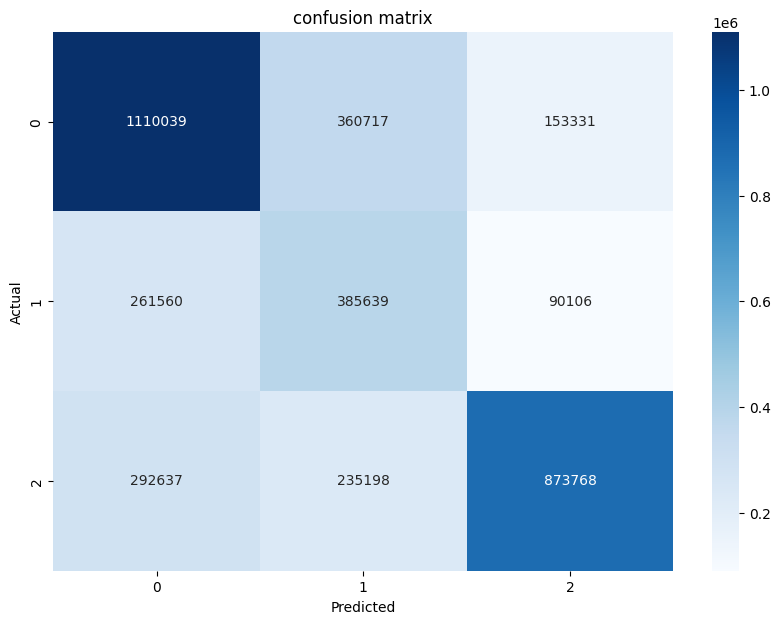

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()